In [2]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as sk_model_selection
import csv
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
"""
数据读取
"""
excelFile = r'health_data.xlsx'
df = pd.DataFrame(pd.read_excel(excelFile))
#补0
df = df.fillna(0)
df1= df[['体温','脉搏','呼吸频率',\
         '身高',\
         '平均高压','平均低压','平均压差','身高',
         '体重','腰围','BMI','锻炼频率',\
         '吸烟状况','饮酒频率',\
         '心率','心律','杂音',\
         '空腹血糖','心电图',\
         'B超腹部','是否脑血管疾病','是否肾脏疾病','是否心脏疾病','是否血管疾病',\
         '神经系统疾病',
         '血常规-白细胞',\
         '性别',\
         '年龄',\
         '高血压']]
df2 = df['糖尿病']



df11 =df1.values
#归一化处理
df11= preprocessing.scale(df11)
df22 =df2.values

In [6]:
print(df11)
print(df22)

[[  0.16402948   0.66832943   0.3633163  ...  -1.85489018   0.07515449
  -13.99247918]
 [  0.04050604  -0.36568046  -0.09897386 ...  -1.85489018   0.07515449
    0.07146696]
 [ -0.0830174    2.73634921  -0.09897386 ...  -1.85489018   0.07515449
    0.07146696]
 ...
 [  0.04050604   0.35017254  -0.09897386 ...   0.53911547   0.07515449
    0.07146696]
 [  0.0713869    0.74786866  -0.09897386 ...   0.53911547   0.07515449
    0.07146696]
 [  0.13314862  -0.12706279  -0.09897386 ...   0.53911547   0.07515449
    0.07146696]]
[0 0 0 ... 0 0 0]


Optimal number of features : 24


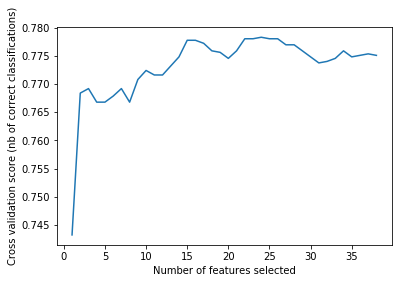

[(1, 'BMI'), (1, 'B超腹部'), (1, '体温'), (1, '嗜油'), (1, '嗜盐'), (1, '平均低压'), (1, '平均压差'), (1, '心电图'), (1, '性别'), (1, '是否脑血管疾病'), (1, '是否血管疾病'), (1, '空腹血糖'), (1, '糖尿病高危人群'), (1, '脉搏'), (1, '腰围'), (1, '荤素'), (1, '血型'), (1, '身高'), (1, '身高'), (1, '锻炼频率'), (1, '饮酒频率'), (1, '高血压'), (1, '高血压遗传病'), (1, '高血压高危人群'), (2, '呼吸频率'), (3, '体重'), (4, '糖尿病遗传病'), (5, '是否肾脏疾病'), (6, '吸烟状况'), (7, '神经系统疾病'), (8, '杂音'), (9, '血常规-白细胞'), (10, '心律'), (11, '嗜糖'), (12, '平均高压'), (13, '年龄'), (14, '是否心脏疾病'), (15, '心率')]


In [8]:
#创建一个SVM模型
svc = SVC(kernel="linear")
#选择REF模型，设置参数 
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
#训练模型
rfecv.fit(df11, df22)
print("Optimal number of features : %d" % rfecv.n_features_)
# 绘图 Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
names = df1.columns.values.tolist()
#打印最优特征组合
print(sorted(zip(map(lambda x: round(x, 4), rfecv.ranking_), names)))

In [10]:
#打乱样本
df = df.sample(frac = 1)
# 提取选择出的特征
df_1 = df[['平均低压','平均压差','平均高压',\
         '是否心脏疾病','是否脑血管疾病','是否血管疾病']]
df_2 = df['高血压']

In [30]:
#朴素贝叶斯
import sklearn.model_selection as sk_model_selection
import sklearn.naive_bayes as sk_bayes
model = sk_bayes.MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None) #多项式分布的朴素贝叶斯
model = sk_bayes.BernoulliNB(alpha=1.0,binarize=0.0,fit_prior=True,class_prior=None) #伯努利分布的朴素贝叶斯
model = sk_bayes.GaussianNB()#高斯分布的朴素贝叶斯

correct = ['roc_auc','recall',None,'precision','f1']
for i in correct:
    ix = sk_model_selection.cross_val_score(model, df_1, y=df_2, scoring=i, cv=10)
    print(str(i) + str(np.mean(ix)))

#查看十次AUC
roc_auc=sk_model_selection.cross_val_score(model, df_1, y=df_2, scoring='roc_auc',cv=10)
print('交叉验证结果: ',roc_auc)

roc_auc0.9005889171084258
recall0.7100739768524044
None0.7638543485637005
precision0.9794051516052036
f10.8225606549666507
交叉验证结果:  [0.91054767 0.88813387 0.91163793 0.9045977  0.88470854 0.89919951
 0.87994663 0.9089018  0.90492668 0.91328884]


In [21]:
#逻辑回归
import sklearn.linear_model as sk_linear
model = sk_linear.LogisticRegression(penalty='l2',dual=False,C=1.0,n_jobs=1,random_state=20,fit_intercept=True)
for i in correct:
    estimate = sk_model_selection.cross_val_score(model, df_1, y=df_2, scoring=i, cv=10)
    print(str(i)+' '+ str(np.mean(estimate)))

roc_auc 0.9009952329816308
recall 0.9337346378713758
None 0.8860751396634695
precision 0.9204903073813349
f1 0.9270209974999635


In [20]:
#决策树算法
from sklearn.tree import DecisionTreeClassifier
#选择分类器
decision_tree_classifier = DecisionTreeClassifier()
#设定参数网格
parameter_grid = {
                  'criterion': ['gini', 'entropy'],
                   'max_depth': [1, 2, 3, 4, 5,6]

                  }
#采用5折交叉验证 寻找最优参数
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=5)
grid_search.fit(df_1, df_2)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8876705001337256
Best parameters: {'criterion': 'entropy', 'max_depth': 6}


In [18]:
#使用最优参数构建模型
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=6)
accuracy=sk_model_selection.cross_val_score(decision_tree_classifier, df_1, y=df_2, scoring=None,cv=10)

#打印各种评估结果
for i in correct:
    estimate = sk_model_selection.cross_val_score(decision_tree_classifier, df_1, y=df_2, scoring=i, cv=10)
    print(str(i) + str(np.mean(estimate)))

roc_auc0.9065819043641797
recall0.9240806586326213
None0.8882249296306386
precision0.9315614670839908
f10.9277274102754625


[ 650  658  661 ... 3736 3737 3738]
[[0.09799987]]
**********
[   0    1    2 ... 3736 3737 3738]
[[0.09784124]]
**********
[   0    1    2 ... 3736 3737 3738]
[[0.13894535]]
**********
[   0    1    2 ... 3736 3737 3738]
[[0.10293239]]
**********
[   0    1    2 ... 3006 3007 3008]
[[0.08502586]]
**********
gendeng:0.10454894264432173
adjust:[0.0017734]


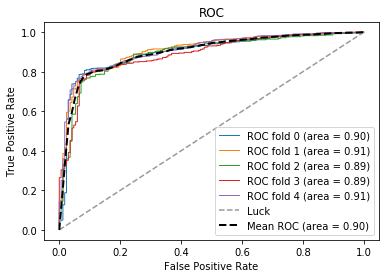

In [32]:
#画ROC曲线
from scipy import interp
from sklearn.metrics import roc_curve, auc
df_1= np.array(df_1)
df_2= np.array(df_2)


mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i=0
adjustthresholds = 0
gedeng = 0


# 画ROC曲线  画5次
for train, test in StratifiedKFold(n_splits=5).split(df_1, df_2):
    print(train)
    # 通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
    probas = model.fit(df_1[train], df_2[train]).predict_proba(df_1[test])

    # 计算 ROC curve and area the curve
    # 通过roc_curve()函数，求出fpr和tpr，以及阈值
    fpr, tpr, thresholds = roc_curve(df_2[test], probas[:, 1])

    # print(thresholds[np.argwhere((tpr - fpr) == max(tpr-fpr))])
    print(thresholds[np.argwhere((tpr - fpr) == max(tpr-fpr))])
    #戈登系数
    gedeng += np.mean(thresholds[np.argwhere((tpr - fpr) == max(tpr-fpr))])
    adjustthresholds += max(thresholds[np.argwhere(tpr >0.90)])
    print("**********")
    mean_tpr += interp(mean_fpr, fpr, tpr)  # 对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数
    mean_tpr[0] = 0.0  # 初始处为0
    roc_auc = auc(fpr, tpr)
    # 画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i = i+1

print("gendeng:"+str(gedeng/5))
print("adjust:"+str(adjustthresholds/5))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')


mean_tpr /= 5 # 在mean_fpr100个点，每个点处插值插值多次取平均
mean_tpr[-1] = 1.0  # 坐标最后一个点为（1,1）
mean_auc = auc(mean_fpr, mean_tpr)  # 计算平均AUC值
# 画平均ROC曲线
# print mean_fpr,len(mean_fpr)
# print mean_tpr
plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
